In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
import random
import math

In [2]:
MRI_Path = './MRNet/MRNet-v1.0/train/axial/{}.npy'

In [3]:
fixedImg = np.load(MRI_Path.format('0701'))

In [18]:
for i in range(100):
    transformedImg = np.zeros(fixedImg.shape)

    translation = np.eye(4)
    rotX = np.eye(4)
    rotY = np.eye(4)
    rotZ = np.eye(4)
    scaling = np.eye(4)

    xTranslationRange = 5
    yTranslationRange = 10
    zTranslationRange = 10
    translation[0, 3] = xTranslationRange * random.random()
    translation[1, 3] = yTranslationRange * random.random()
    translation[2, 3] = zTranslationRange * random.random()

    xRotAngle = math.pi / random.uniform(20, 200)
    rotX[1, 1] = math.cos(xRotAngle)
    rotX[1, 2] = math.sin(xRotAngle)
    rotX[2, 1] = -math.sin(xRotAngle)
    rotX[2, 2] = math.cos(xRotAngle)

    yRotAngle = math.pi / random.uniform(100, 200)
    rotY[0, 0] = math.cos(yRotAngle)
    rotY[0, 2] = -math.sin(yRotAngle)
    rotY[2, 0] = math.sin(yRotAngle)
    rotY[2, 2] = math.cos(yRotAngle)

    zRotAngle = math.pi / random.uniform(100, 200)
    rotZ[0, 0] = math.cos(zRotAngle)
    rotZ[0, 1] = -math.sin(zRotAngle)
    rotZ[1, 0] = math.sin(zRotAngle)
    rotZ[1, 1] = math.cos(zRotAngle)

    scalingX = random.uniform(0.9, 1.1)
    scalingY = random.uniform(0.9, 1.1)
    scalingZ = random.uniform(0.9, 1.1)
    scaling[0, 0] = scalingX
    scaling[1, 1] = scalingY
    scaling[2, 2] = scalingZ

    transMat = translation @ rotZ @ rotY @ rotX @ scaling
    
    out = scipy.ndimage.affine_transform(input=fixedImg, matrix=np.linalg.inv(transMat), output=transformedImg)
    
    path = "./affineTrainingData/affine{}.npz"
    f = open(path.format(i), "wb")
    reshapedLabel = transMat[0:3].flatten()
    np.savez(f, img = transformedImg, trf = reshapedLabel)
    f.close()
    print("file {} has been saved.".format(i))

file 0 has been saved.
file 1 has been saved.
file 2 has been saved.
file 3 has been saved.
file 4 has been saved.
file 5 has been saved.
file 6 has been saved.
file 7 has been saved.
file 8 has been saved.
file 9 has been saved.
file 10 has been saved.
file 11 has been saved.
file 12 has been saved.
file 13 has been saved.
file 14 has been saved.
file 15 has been saved.
file 16 has been saved.
file 17 has been saved.
file 18 has been saved.
file 19 has been saved.
file 20 has been saved.
file 21 has been saved.
file 22 has been saved.
file 23 has been saved.
file 24 has been saved.
file 25 has been saved.
file 26 has been saved.
file 27 has been saved.
file 28 has been saved.
file 29 has been saved.
file 30 has been saved.
file 31 has been saved.
file 32 has been saved.
file 33 has been saved.
file 34 has been saved.
file 35 has been saved.
file 36 has been saved.
file 37 has been saved.
file 38 has been saved.
file 39 has been saved.
file 40 has been saved.
file 41 has been saved.
fi

In [17]:
test = np.load(path.format("test.npz"))
print(test['trf'].shape)

Exception ignored in: <function ZipFile.__del__ at 0x7f91dba07d30>
Traceback (most recent call last):
  File "/Users/wyx/opt/anaconda3/lib/python3.8/zipfile.py", line 1821, in __del__
    self.close()
  File "/Users/wyx/opt/anaconda3/lib/python3.8/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: I/O operation on closed file.
Exception ignored in: <function ZipFile.__del__ at 0x7f91dba07d30>
Traceback (most recent call last):
  File "/Users/wyx/opt/anaconda3/lib/python3.8/zipfile.py", line 1821, in __del__
    self.close()
  File "/Users/wyx/opt/anaconda3/lib/python3.8/zipfile.py", line 1838, in close
    self.fp.seek(self.start_dir)
ValueError: I/O operation on closed file.


(12,)


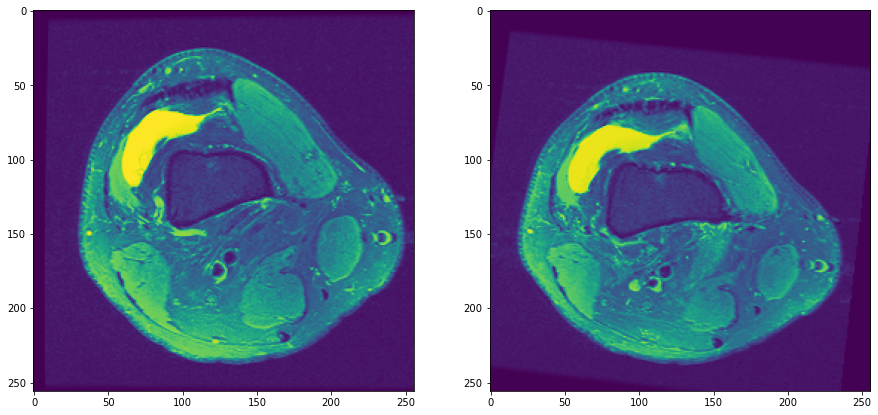

In [8]:
sliceToCheck = 10
fig, axs = plt.subplots(1, 2, figsize=(15, 15))
axs[0].imshow(fixedImg[sliceToCheck, :, :])
axs[1].imshow(transformedImg[sliceToCheck, :, :])